<a href="https://colab.research.google.com/github/Yannnyan/RoboticHand/blob/main/image_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Input3.png', 'Input8.png', 'Input2.png', 'Input9.png', 'Input6.png', 'Input10.png', 'Input7.png', 'Input1.png', 'Input4.png', 'Input5.png', 'Input11.png']


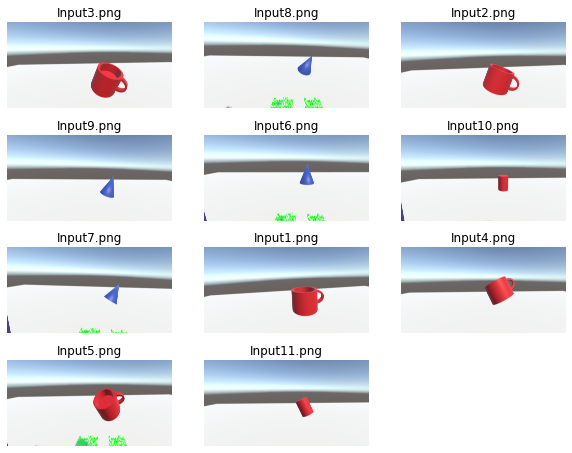

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from os.path import isfile, join
imglst = [f for f in listdir('data')]
print(imglst)
fig = plt.figure(figsize=(10,10))
for i in range(len(imglst)):
  fig.add_subplot(5,3,i+1)
  img = np.asarray(Image.open('./data/' + str(imglst[i])))
  plt.imshow(img)
  plt.title(imglst[i])
  plt.axis('off')

In [ ]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

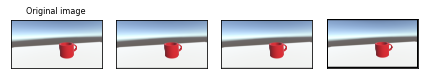

In [ ]:
import torchvision.transforms as T
from pathlib import Path
path = Path('data')
orig_img = Image.open(path / 'Input1.png')
padded_images = [T.Pad(padding=padding)(orig_img) for padding in (3, 5, 50)]
plot(padded_images) 

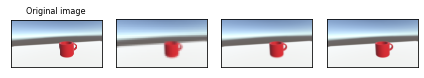

In [ ]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100)]
plot(resized_imgs)

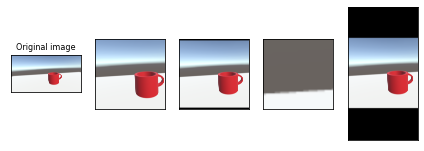

In [ ]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (1700, 2000, 100, orig_img.size)]
plot(center_crops)

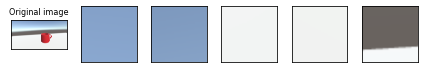

In [ ]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

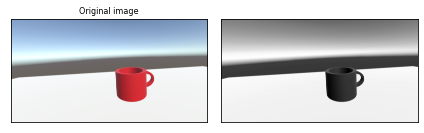

In [ ]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

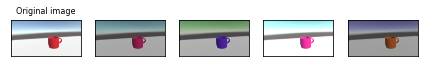

In [ ]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

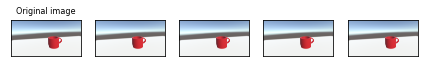

In [ ]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

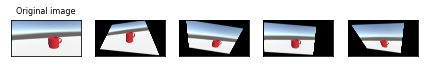

In [ ]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

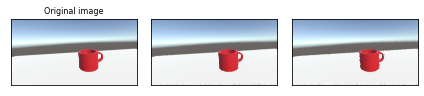

In [ ]:
elastic_transformer = T.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot(transformed_imgs)

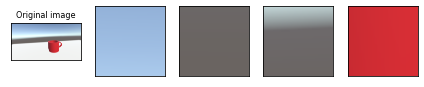

In [ ]:
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

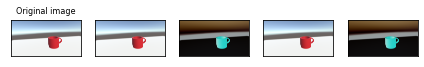

In [ ]:
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)